In [1]:
# Use warpx_env as kernal
import numpy as np
import h5py
import matplotlib.colors as colors
import scipy
import matplotlib.pyplot as plt
import scipy.constants as cons
from matplotlib.colors import LinearSegmentedColormap
import math
import matplotlib.gridspec as gridspec
from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics
from openpmd_viewer import ParticleTracker

def add_colorbar(im, width = None, pad = None, **kwargs):
    l, b, w, h = im.axes.get_position().bounds  # get boundaries
    width = width or 0.05*w                    # width of colorbar
    pad = pad or width                         # pad between im and cbar
    fig = im.axes.figure                       # get figure of image
    cax = fig.add_axes([l + w + pad, b, width, h]) # define cbar axes
    return fig.colorbar(im,cax=cax,**kwargs)
#######################constants#####################

qe = cons.elementary_charge
me = cons.electron_mass
epsilon0 = cons.epsilon_0
clight = cons.speed_of_light
pi = cons.pi

### We are looking at a 1D laser field propagating in free space. The solver that we are using is called the Finite Difference Time Domain (FDTD) solver. It is a method of solving Maxwell's equations. The solver following whats called the Courant condition which states that in order for a simulation to be stable:

# $$ c \Delta t \leq \Delta x $$

### where c is the speed of light, $\Delta t$ is the time step and $\Delta x$ is the spatial step. A light wave must not travel farther than one spatial cell in a single time step.

In [2]:
#microns
um = 10**-6
# Wavelength
lam = 1*um
# laser frequency
w_l = 2*pi*clight / lam
# Physcial domain
dom = 110*um
# Number of grid cells
cells = 2048
# spatial step
dx = dom/cells
# Wavelengths per cell
lam_per_cell = lam/dx
# Time step
dt = 0.999*(dx/clight)
# Number of time steps 
total_steps = 2100
# number of output intervals
intervals = 2
# Number of data dumps
data_dumps = total_steps / intervals

###########################
print("Delta x = {}".format(dx))
print("Wavelengths per cell = {}".format(lam_per_cell))
print("Delta t = {}".format(dt))
print("Data dumps = {}".format(data_dumps))

Delta x = 5.3710937499999995e-08
Wavelengths per cell = 18.618181818181817
Delta t = 1.789812422916256e-16
Data dumps = 1050.0


# Load data with OpenPMDTimeSeries

In [3]:
data_path = "/Users/victorflores/warpx_env/WarpX/EM_Wave/diags/diag1"
data = OpenPMDTimeSeries("{}".format(data_path),backend ="h5py")

In [4]:
# check the number of output files
len(data.iterations)

22

# By changing j you can look at the laser pulse at different times

In [22]:
# get the simulation time 
time = data.t
# The iteration 
j = 10
# the electric field and meta data 
Ey, info_Ey = data.get_field( t=time[j],  field='E', coord='y' )
axis_z = info_Ey.z

# Typically we normalize the electric field via a normalized laser parameter a0
norm = (2*pi*me*clight**2) / (qe*lam)
Ey_a0 = Ey / norm

Text(0.5, 0, '$z [\\mu m]$')

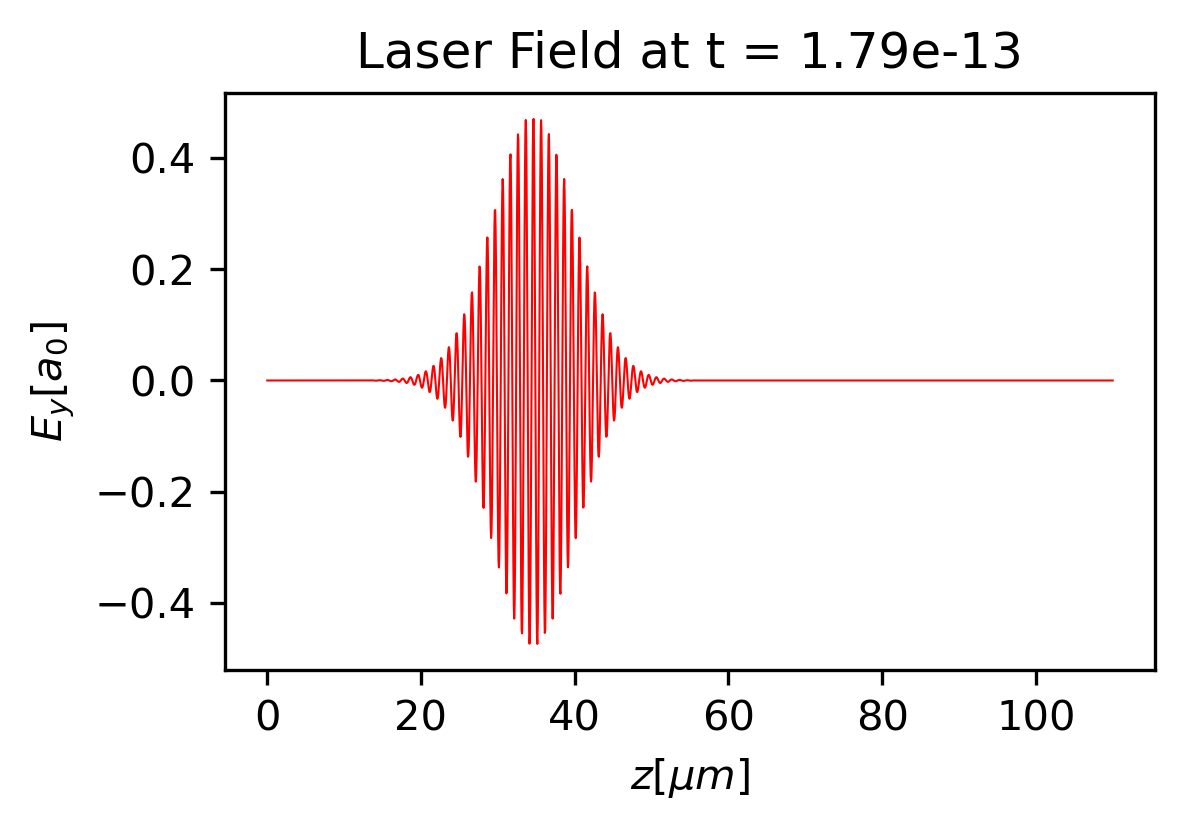

In [23]:
fig_width = 4
fig_height = 2.5
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)

ax.plot(axis_z*1e6, Ey_a0, color="red", linewidth=0.5, label="Ey")
ax.set_title("Laser Field at t = {:.2e}".format(time[j]))
ax.set_ylabel(r"$E_y [a_0]$")
ax.set_xlabel(r"$z [\mu m]$")